In [1]:
import os
import numpy as np
from numpy import *
import csv
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
from math import sqrt
import statsmodels.api as sm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
## import data
df = pd.read_csv('/content/drive/MyDrive/Project/HPQ.csv', parse_dates=['Date'])

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,2.682221,2.802850,2.668029,2.802850,1.239568,11561381
1,1990-01-03,2.802850,2.817041,2.724796,2.753179,1.217600,12022920
2,1990-01-04,2.753179,2.767371,2.682221,2.724796,1.205047,6810346
3,1990-01-05,2.717700,2.717700,2.682221,2.689317,1.189357,5281277
4,1990-01-08,2.689317,2.774466,2.660933,2.738987,1.211323,5903122


In [6]:
df = df.rename(columns={'Close': 'Price'})

In [7]:
df.tail()

,Date,Open,High,Low,Price,Adj Close,Volume
8419,2023-06-02,29.520000,30.790001,29.520000,30.549999,30.549999,10255700
8420,2023-06-05,30.459999,30.459999,29.260000,29.290001,29.290001,9679700
8421,2023-06-06,29.120001,29.910000,29.059999,29.650000,29.650000,6805700
8422,2023-06-07,29.610001,30.049999,29.490000,29.930000,29.930000,7268200
8423,2023-06-08,30.030001,30.200001,29.559999,30.040001,30.040001,5075000


In [8]:
df.shape

(8424, 7)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Price', 'Adj Close', 'Volume'], dtype='object')

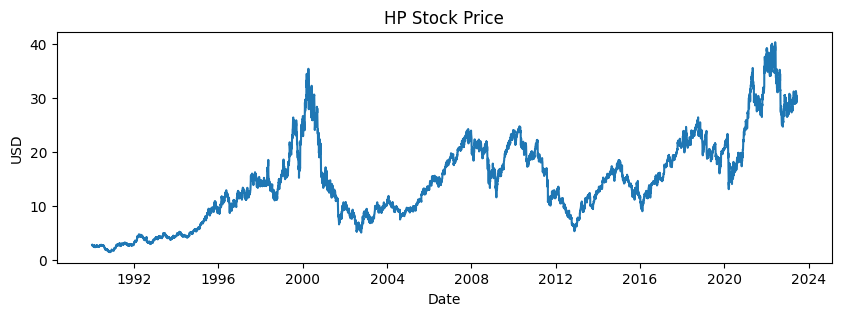

In [10]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df['Date'], df['Price'], label='HP stock')
ax.set(xlabel="Date",
       ylabel="USD",
       title="HP Stock Price")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [11]:
import plotly.graph_objects as go

#to plot the candle plot
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Price'])])

fig.update_layout(xaxis=dict(title='Date'),
                  yaxis=dict(title='Price (USD)'),
                  xaxis_title_standoff=50,
                  yaxis_title_standoff=50,
                  title={'text': 'HP Stock',
         'y': 0.9,'x': 0.5,'xanchor': 'center','yanchor': 'top'})

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
# df = df.iloc[::-1].reset_index()

In [12]:
df.head()

,Date,Open,High,Low,Price,Adj Close,Volume
0,1990-01-02,2.682221,2.802850,2.668029,2.802850,1.239568,11561381
1,1990-01-03,2.802850,2.817041,2.724796,2.753179,1.217600,12022920
2,1990-01-04,2.753179,2.767371,2.682221,2.724796,1.205047,6810346
3,1990-01-05,2.717700,2.717700,2.682221,2.689317,1.189357,5281277
4,1990-01-08,2.689317,2.774466,2.660933,2.738987,1.211323,5903122


In [13]:
def get_technical_indicators(data):
    # Create 7 and 21 days Moving Average
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean()
    data['MA21'] = data.iloc[:,4].rolling(window=21).mean()

    # Create MACD
    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA21'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA21'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [14]:
T_df = get_technical_indicators(df)

In [15]:
T_df.head()

,Date,Open,High,Low,Price,Adj Close,Volume,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,1990-01-02,2.682221,2.802850,2.668029,2.802850,1.239568,11561381,NaN,NaN,0.120629,NaN,NaN,NaN,2.802850,0.589369
1,1990-01-03,2.802850,2.817041,2.724796,2.753179,1.217600,12022920,NaN,NaN,0.076280,NaN,NaN,NaN,2.765597,0.561431
2,1990-01-04,2.753179,2.767371,2.682221,2.724796,1.205047,6810346,NaN,NaN,0.049441,NaN,NaN,NaN,2.737350,0.545109
3,1990-01-05,2.717700,2.717700,2.682221,2.689317,1.189357,5281277,NaN,NaN,0.028798,NaN,NaN,NaN,2.704928,0.524324
4,1990-01-08,2.689317,2.774466,2.660933,2.738987,1.211323,5903122,NaN,NaN,0.032008,NaN,NaN,NaN,2.727728,0.553303


In [16]:
dataset = T_df.iloc[20:,:].reset_index(drop=True)

In [17]:
dataset.head()

,Date,Open,High,Low,Price,Adj Close,Volume,MA7,MA21,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,1990-01-30,2.476442,2.540304,2.476442,2.511921,1.110903,9991795,2.510907,2.610249,0.023492,0.087982,2.786212,2.434286,2.502783,0.413381
1,1990-01-31,2.511921,2.547400,2.511921,2.533208,1.120317,6410462,2.511921,2.597409,0.025546,0.081410,2.760229,2.434588,2.523066,0.427362
2,1990-02-01,2.533208,2.561592,2.519017,2.519017,1.114041,13004131,2.509894,2.586258,0.022576,0.076268,2.738794,2.433722,2.520367,0.418063
3,1990-02-02,2.519017,2.582879,2.497729,2.533208,1.120317,11096318,2.508880,2.577135,0.023273,0.072305,2.721745,2.432525,2.528928,0.427362
4,1990-02-05,2.533208,2.575783,2.526113,2.575783,1.139146,4516742,2.521044,2.571729,0.025231,0.060687,2.693102,2.450355,2.560165,0.454752


In [ ]:
def plot_technical_indicators(dataset, last_days):
       plt.figure(figsize=(16, 10), dpi=100)
       shape_0 = dataset.shape[0]
       xmacd_ = shape_0 - last_days

       dataset = dataset.iloc[-last_days:, :]
       x_ = range(3, dataset.shape[0])
       x_ = list(dataset.index)

       # Plot first subplot
       plt.subplot(2, 1, 1)
       plt.plot(dataset['MA7'], label='MA 7', color='g', linestyle='--')
       plt.plot(dataset['Price'], label='Closing Price', color='b')
       plt.plot(dataset['MA21'], label='MA 21', color='r', linestyle='--')
       plt.plot(dataset['upper_band'], label='Upper Band', color='c')
       plt.plot(dataset['lower_band'], label='Lower Band', color='c')
       plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
       plt.title('Technical indicators for HP - last {} days.'.format(last_days))
       plt.ylabel('USD')
       plt.legend()

       # Plot second subplot
       plt.subplot(2, 1, 2)
       plt.title('MACD')
       plt.plot(dataset['MACD'], label='MACD', linestyle='-.')
       plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
       plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
       plt.plot(dataset['logmomentum'], label='Momentum', color='b', linestyle='-')

       plt.legend()
       plt.show()

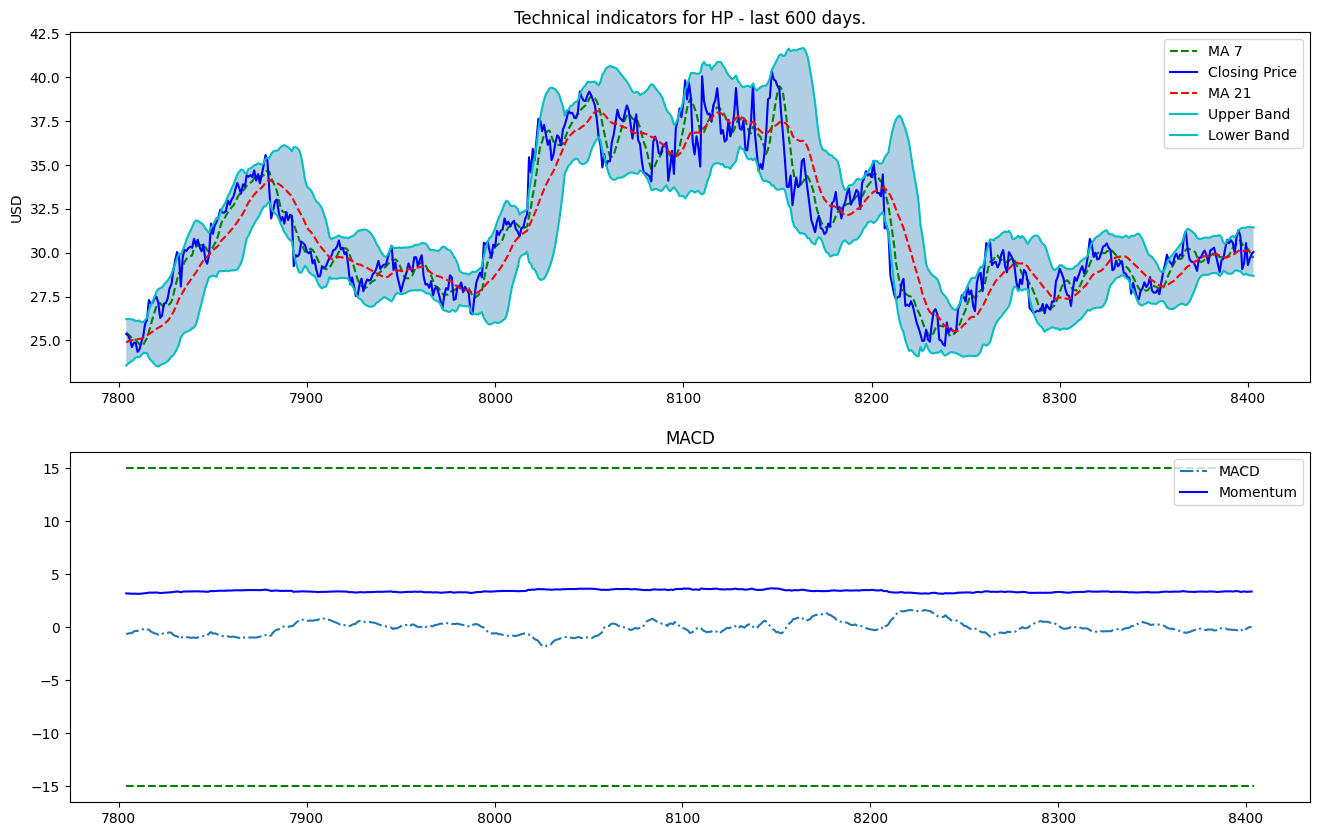

In [ ]:
plot_technical_indicators(dataset, 600)

In [ ]:
def get_fourier_transfer(dataset):
    # Get the columns for doing fourier
    data_FT = dataset[['Date', 'Price']]

    close_fft = np.fft.fft(np.asarray(data_FT['Price'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_com_df = pd.DataFrame()
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        fft_ = np.fft.ifft(fft_list_m10)
        fft_com = pd.DataFrame({'fft': fft_})
        fft_com['absolute of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.abs(x))
        fft_com['angle of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.angle(x))
        fft_com = fft_com.drop(columns='fft')
        fft_com_df = pd.concat([fft_com_df, fft_com], axis=1)

    return fft_com_df

In [ ]:
dataset_F = get_fourier_transfer(dataset)

In [ ]:
Final_data = pd.concat([dataset, dataset_F], axis=1)

In [ ]:
Final_data.head()

,Date,Open,High,Low,Price,Adj Close,Volume,MA7,MA21,MACD,...,upper_band,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
0,1990-01-30,2.476442,2.540304,2.476442,2.511921,1.110903,9991795,2.510907,2.610249,0.023492,...,2.786212,2.434286,2.502783,0.413381,15.856598,-0.223081,17.346596,-0.081160,17.350266,-0.100065
1,1990-01-31,2.511921,2.547400,2.511921,2.533208,1.120317,6410462,2.511921,2.597409,0.025546,...,2.760229,2.434588,2.523066,0.427362,15.841152,-0.223343,17.308226,-0.081417,17.277689,-0.100191
2,1990-02-01,2.533208,2.561592,2.519017,2.519017,1.114041,13004131,2.509894,2.586258,0.022576,...,2.738794,2.433722,2.520367,0.418063,15.825699,-0.223605,17.269835,-0.081673,17.205105,-0.100314
3,1990-02-02,2.519017,2.582879,2.497729,2.533208,1.120317,11096318,2.508880,2.577135,0.023273,...,2.721745,2.432525,2.528928,0.427362,15.810241,-0.223866,17.231423,-0.081929,17.132516,-0.100433
4,1990-02-05,2.533208,2.575783,2.526113,2.575783,1.139146,4516742,2.521044,2.571729,0.025231,...,2.693102,2.450355,2.560165,0.454752,15.794778,-0.224127,17.192992,-0.082185,17.059924,-0.100549


In [ ]:
def plot_Fourier(dataset):
    data_FT = dataset[['Date', 'Price']]

    close_fft = np.fft.fft(np.asarray(data_FT['Price'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    plt.plot(data_FT['Price'], label='Real')
    plt.xlabel('Days')
    plt.ylabel('USD')
    plt.title('HP (close) stock prices & Fourier transforms')
    plt.legend()
    plt.show()

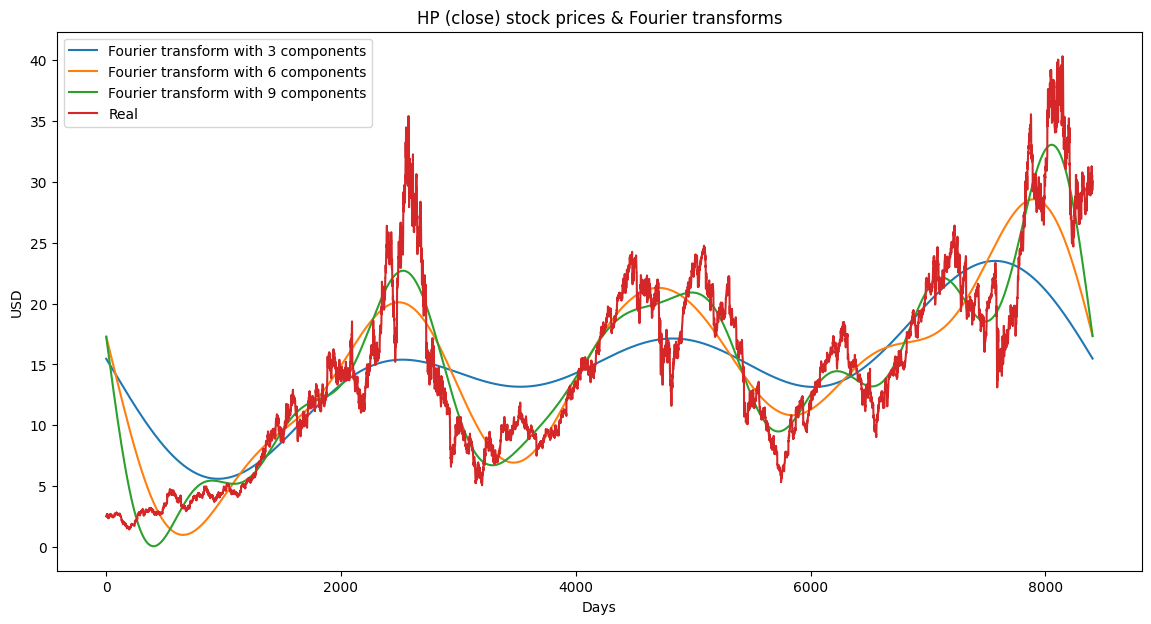

In [ ]:
plot_Fourier(Final_data)

In [ ]:
Final_data.isna().sum()

Date                  0
Open                  0
High                  0
Low                   0
Price                 0
Adj Close             0
Volume                0
MA7                   0
MA21                  0
MACD                  0
20SD                  0
upper_band            0
lower_band            0
EMA                   0
logmomentum           0
absolute of 3 comp    0
angle of 3 comp       0
absolute of 6 comp    0
angle of 6 comp       0
absolute of 9 comp    0
angle of 9 comp       0
dtype: int64

In [ ]:
dataset = Final_data.copy()

In [ ]:
dataset.to_csv("/content/drive/MyDrive/Project/dataset.csv", index=False)

In [ ]:
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)

In [ ]:
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [ ]:
# Get features and target
X_value = pd.DataFrame(dataset.iloc[:, :])
y_value = pd.DataFrame(dataset.iloc[:, 0])

In [ ]:
dataset.shape

(8404, 20)

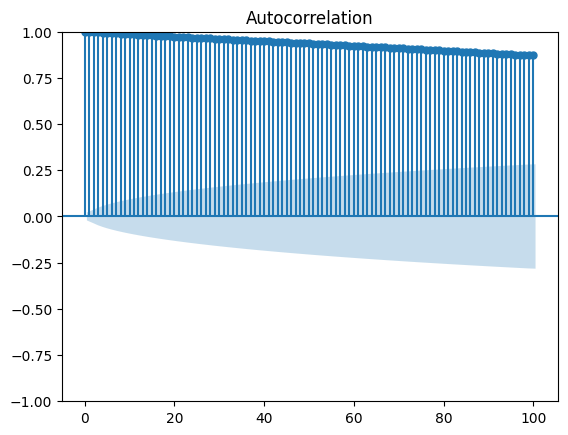

In [ ]:
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=100)
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8404 entries, 1990-01-30 to 2023-06-08
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                8404 non-null   float64
 1   High                8404 non-null   float64
 2   Low                 8404 non-null   float64
 3   Price               8404 non-null   float64
 4   Adj Close           8404 non-null   float64
 5   Volume              8404 non-null   int64  
 6   MA7                 8404 non-null   float64
 7   MA21                8404 non-null   float64
 8   MACD                8404 non-null   float64
 9   20SD                8404 non-null   float64
 10  upper_band          8404 non-null   float64
 11  lower_band          8404 non-null   float64
 12  EMA                 8404 non-null   float64
 13  logmomentum         8404 non-null   float64
 14  absolute of 3 comp  8404 non-null   float64
 15  angle of 3 comp     8404 non-null   f

In [ ]:
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

In [ ]:
X_scale_dataset

array([[-0.94564801, -0.94781019, -0.94378499, ..., -0.85781327,
        -0.00249624, -0.74970913],
       [-0.9438118 , -0.94745515, -0.94191116, ..., -0.85828116,
        -0.00712527, -0.74984373],
       [-0.9427101 , -0.94674506, -0.94153639, ..., -0.85874833,
        -0.01175473, -0.74997464],
       ...,
       [ 0.43328472,  0.4216064 ,  0.46022928, ..., -0.85640529,
         0.01138735, -0.74928362],
       [ 0.45864458,  0.42861111,  0.48293984, ..., -0.85687532,
         0.00676017, -0.74942903],
       [ 0.48038161,  0.43611632,  0.48663685, ..., -0.85734465,
         0.00213228, -0.74957088]])

In [ ]:
dump(X_scaler, open('/content/drive/MyDrive/Project/X_scaler.pkl', 'wb'))
dump(y_scaler, open('/content/drive/MyDrive/Project/y_scaler.pkl', 'wb'))

In [ ]:
X_value.shape[1]

20

In [ ]:
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

In [ ]:
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

In [ ]:
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)

In [ ]:
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [ ]:
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)

In [ ]:
X_test

array([[[-0.49891889, -0.50549628, -0.49006228, ..., -0.8320839 ,
         -0.42217288, -0.52128556],
        [-0.48998756, -0.50231516, -0.48886306, ..., -0.83113776,
         -0.42122377, -0.52049973],
        [-0.49680362, -0.51458511, -0.49605859, ..., -0.83018891,
         -0.42027161, -0.51972212]],

       [[-0.48998756, -0.50231516, -0.48886306, ..., -0.83113776,
         -0.42122377, -0.52049973],
        [-0.49680362, -0.51458511, -0.49605859, ..., -0.83018891,
         -0.42027161, -0.51972212],
        [-0.50502984, -0.5166301 , -0.50589245, ..., -0.82923738,
         -0.41931645, -0.51895274]],

       [[-0.49680362, -0.51458511, -0.49605859, ..., -0.83018891,
         -0.42027161, -0.51972212],
        [-0.50502984, -0.5166301 , -0.50589245, ..., -0.82923738,
         -0.41931645, -0.51895274],
        [-0.50197439, -0.51117679, -0.49270066, ..., -0.82828321,
         -0.41835835, -0.5181916 ]],

       ...,

       [[ 0.44104789,  0.42360781,  0.44702549, ..., -0.8549910

In [ ]:
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

In [ ]:
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)

In [ ]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

X shape:  (8401, 3, 20)
y shape:  (8401, 1)
X_train shape:  (5881, 3, 20)
y_train shape:  (5881, 1)
y_c_train shape:  (5881, 3, 1)
X_test shape:  (2520, 3, 20)
y_test shape:  (2520, 1)
y_c_test shape:  (2520, 3, 1)
index_train shape: (5881,)
index_test shape: (2520,)


In [ ]:
np.save("/content/drive/MyDrive/Project/X_train.npy", X_train)
np.save("/content/drive/MyDrive/Project/y_train.npy", y_train)
np.save("/content/drive/MyDrive/Project/X_test.npy", X_test)
np.save("/content/drive/MyDrive/Project/y_test.npy", y_test)
np.save("/content/drive/MyDrive/Project/yc_train.npy", yc_train)
np.save("/content/drive/MyDrive/Project/yc_test.npy", yc_test)
np.save('/content/drive/MyDrive/Project/index_train.npy', index_train)
np.save('/content/drive/MyDrive/Project/index_test.npy', index_test)